In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [2]:
from pandas.tseries.offsets import MonthEnd

In [14]:
%store -r x
%store -r sector_beat_spx

In [15]:
%run -i financial_sector_functions.py

In [16]:
dir_str = '/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/'+'iym_pc_ratio.csv'

pc_ratio = pd.read_csv(dir_str)
pc_ratio.index = pc_ratio.iloc[:,0].values
pc_ratio = pc_ratio.iloc[:,[1]]
pc_ratio.index = pd.DatetimeIndex(pc_ratio.index)
pc_ratio = pc_ratio.resample("M").last()

In [17]:
x,y = model_data(x,sector_beat_spx)

In [18]:
# y = sector_beat_spx

In [19]:
x = (x/np.linalg.norm(x,axis =0))

In [20]:
x = pd.concat([pc_ratio,x],1)

In [21]:
x

,IYM PUT_CALL_OPEN_INTEREST_RATIO,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
2000-12-31,NaN,0.020993,0.011167,0.031851,-0.007642,-0.032951,0.192400,-0.022645,0.058718,0.042501,...,0.000656,-0.032759,-0.135664,0.154161,-0.100861,-0.109064,-0.152481,0.053660,0.071944,0.399259
2001-01-31,NaN,0.076047,-0.042493,0.030987,0.022013,-0.086015,0.179773,-0.070587,0.037133,0.045771,...,0.022222,0.006814,-0.131250,-0.025829,-0.113104,-0.092988,0.000000,0.055647,0.105800,0.000000
2001-02-28,NaN,0.076047,0.001660,0.055858,-0.008250,0.225788,0.165043,-0.070587,-0.013673,0.045771,...,0.020746,-0.047990,-0.048745,-0.039556,-0.084132,-0.057569,0.000000,0.057691,0.082524,0.000000
2001-03-31,NaN,0.076047,0.069586,0.062042,-0.085577,-0.059030,0.159632,-0.070587,0.026803,0.046860,...,0.030218,0.032954,-0.049404,-0.135796,-0.126421,-0.025746,0.029729,0.059951,0.074060,-0.068653
2001-04-30,NaN,0.000635,0.012214,0.068811,-0.011945,-0.016725,0.144300,0.017442,0.088975,0.047950,...,0.043543,0.009500,-0.011864,0.041357,-0.138145,0.042572,0.000000,0.062500,0.080408,0.000000
2001-05-31,NaN,0.000635,-0.001504,0.076847,-0.039828,-0.077543,0.126563,0.017442,0.026384,0.046860,...,0.048914,0.026209,-0.056387,-0.082662,0.006104,-0.032241,0.000000,0.065257,0.076176,0.000000
2001-06-30,NaN,0.000635,-0.052746,0.068296,-0.034040,-0.044600,0.119348,0.017442,0.022758,0.049040,...,0.047971,-0.021609,-0.018276,-0.009956,-0.086958,-0.026911,-0.073558,0.068114,0.086756,-0.175812
2001-07-31,NaN,0.035651,-0.035443,0.053613,-0.047881,-0.047786,0.113335,-0.022413,0.069285,0.050130,...,0.051538,0.040502,-0.149313,0.058111,-0.064304,-0.137041,0.000000,0.069966,0.082524,0.000000
2001-08-31,NaN,0.035651,-0.042103,0.033637,-0.074057,0.100350,0.109728,-0.022413,-0.170543,0.053399,...,0.049324,0.095729,-0.074910,0.098577,-0.072220,-0.071441,0.000000,0.071893,0.061364,0.000000
2001-09-30,NaN,0.035651,-0.053270,0.014655,-0.100668,-0.041813,0.092292,-0.022413,0.369720,0.054489,...,0.071218,-0.064627,-0.126336,0.000262,-0.232435,-0.051376,0.159666,0.075142,0.071944,-0.127642


In [10]:
nunmber_of_years_lookback = 10
month_forecast = 12

nu = True

logistic_result_dict = {}
coef_all_df = pd.DataFrame()
accuracy_dict = {}
y_prediction_dict ={}
number_of_runs = 0.0
for dt_index in x.index[x.index>=x.index.min()+pd.DateOffset(years = nunmber_of_years_lookback)][:-(month_forecast-1)]:
    begin_index,end_index = dt_index+pd.DateOffset(years = -nunmber_of_years_lookback)+MonthEnd(0),dt_index+MonthEnd(-1)
    selection = (x.index>=begin_index) & (x.index <= end_index)
    spliced_x = x[selection]
    spliced_y = y[selection]
    assert(len(spliced_x)==nunmber_of_years_lookback*12)
    logistic  = LogisticRegression(penalty='l2', C = 1/(3.0))

    if nu:
        nu = svm.NuSVC()
        nu.fit(spliced_x,spliced_y)
        nu_predict = pd.DataFrame(nu.predict(spliced_x),index=spliced_x.index)
        spliced_x_added = pd.concat([nu_predict,spliced_x],1).dropna()
        logistic.fit(spliced_x_added,spliced_y)
    else:
        logistic.fit(spliced_x,spliced_y)
#     coef_df = pd.DataFrame(logistic.coef_,columns = spliced_x.columns,index = [dt_index])
#     coef_all_df = pd.concat([coef_all_df,coef_df])
    
    
    
    test_begin_index,test_end_index = dt_index+pd.DateOffset(months=+1)+MonthEnd(-1),dt_index+pd.DateOffset(months=+month_forecast)+MonthEnd(-1)
    test_selection = (x.index>=test_begin_index) & (x.index<=test_end_index)
    test_x = x[test_selection]
    test_y = y[test_selection]
    assert(len(test_y)==month_forecast)
    if nu:
        nu_predict = pd.DataFrame(nu.predict(test_x),index = test_x.index)
        test_x_add = pd.concat([nu_predict,test_x],1)
        y_prediction = pd.DataFrame(logistic.predict(test_x_add),index = test_y.index,columns = test_y.columns)
    else:
        y_prediction = pd.DataFrame(logistic.predict(test_x),index = test_y.index,columns = test_y.columns)
        
    y_prediction_dict[dt_index] = y_prediction
    accuracy_df = ((y_prediction-test_y)==0)*1
    accuracy_dict[dt_index] = accuracy_df
    number_of_runs +=1
print(number_of_runs)

ValueError: Item wrong length 224 instead of 197.

In [ ]:
# overall accuracy
mean_accuracy_list = []
for key,value in accuracy_dict.iteritems():
    mean_accuracy_list.append((value.values.flatten()))
np.mean(mean_accuracy_list)

In [100]:
(value.values.flatten())[0:3]

array([1, 1, 0])

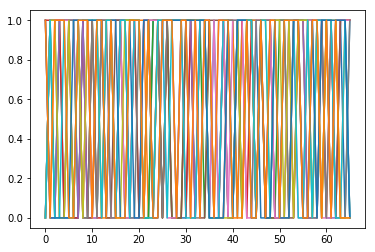

In [101]:
# plt.plot(mean_accuracy_list)
# plt.show()